<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/IR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#!/usr/bin/env python3
#Here is very first step of getting response of url from browser

import requests as req

resp = req.get("http://www.multimediaeval.org/mediaeval2019/memorability/")
resp2 = req.get('http://sites.google.com/view/siirh2020/')

print(resp.text)
print(resp2.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
	<head>
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
		<meta name="generator" content="RapidWeaver" />
		
		<title>Media Memorability</title>
		<link rel="stylesheet" type="text/css" media="print" href="../../rw_common/themes/simple/consolidated-print-114.css" />
		<link rel="stylesheet" type="text/css" media="screen" href="../../rw_common/themes/simple/consolidated-screen-114.css" />
		<link rel="stylesheet" type="text/css" media="handheld" href="../../rw_common/themes/simple/consolidated-handheld-114.css" />
		
		
		
		
		
		
		
		<script type="text/javascript" src="../../rw_common/themes/simple/javascript.js"></script>
		
		
		
	</head>
<body>
<div id="container"><!-- Start container -->
	
	<div id="pageHeader"><!-- Start page header -->
		
		<h1>MediaEval Benchmarking Initiative for Multimedia Evaluation

In [0]:
#Writing file1 in csv
from html.parser import HTMLParser
import csv

parserfile=[]
class MyHTMLParser(HTMLParser):

    def handle_data(self, data):
      if(len(data.strip())!= 0): 
        parserfile.append(data)

parser = MyHTMLParser()
data=parser.feed(resp.text)


with open('parsed_file.csv', mode='w+') as parsed_file:
  parsed_writer = csv.writer(parsed_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  parsed_writer.writerow(parserfile)


In [0]:
#Writing file2 in csv
parserfile2=[]

class MyHTMLParser(HTMLParser):

    def handle_data(self, data):
      if(len(data.strip())!= 0): 
        parserfile2.append(data)

parser = MyHTMLParser()
data=parser.feed(resp2.text)


with open('parsed_file2.csv', mode='w+') as parsed_file2:
  parsed_writer = csv.writer(parsed_file2, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  parsed_writer.writerow(parserfile2)

In [0]:
with open('parserf.txt', 'w') as f:
    for item in parserfile:
        f.write("%s\n" % item)



In [52]:
f = open("parserf.txt", "r")
pf=f.read()
print(pf)



Media Memorability
MediaEval Benchmarking Initiative for Multimedia Evaluation
The "multi" in multimedia: speech, audio, visual content, tags, users, context
Home
About MediaEval
Datasets
MediaEval 2019
Emotion & Themes in Music
Eyes & Ears Together
GameStory
Lifelogging for wellbeing
Medico Multimedia
Multimedia RecSys
Multimedia Satellite
No-audio speech turns
Pixel Privacy
Media Memorability
Scene Change
Sports video
MediaEval 2018
MediaEval 2017
MediaEval 2016
MediaEval 2015
MediaEval 2014
MediaEval 2013
MediaEval 2012
MediaEval 2011
MediaEval 2010
VideoCLEF 2009
VideoCLEF 2008
Videos about MediaEval
Why Participate?
Who are we?
Open Science
Acknowledgments
The 2019 Predicting Media Memorability Task
Task description
This task focuses on the problem of predicting how memorable a video is to viewers. It requires participants to automatically predict memorability scores for videos that reflect the probability a video will be remembered. Task participants are provided with an extensiv

In [67]:
#data preprocessing pipeline
import re, string, unicodedata
import nltk

import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

resp2_p = denoise_text(pf)
print(resp2_p)
 

Media Memorability
MediaEval Benchmarking Initiative for Multimedia Evaluation
The "multi" in multimedia: speech, audio, visual content, tags, users, context
Home
About MediaEval
Datasets
MediaEval 2019
Emotion & Themes in Music
Eyes & Ears Together
GameStory
Lifelogging for wellbeing
Medico Multimedia
Multimedia RecSys
Multimedia Satellite
No-audio speech turns
Pixel Privacy
Media Memorability
Scene Change
Sports video
MediaEval 2018
MediaEval 2017
MediaEval 2016
MediaEval 2015
MediaEval 2014
MediaEval 2013
MediaEval 2012
MediaEval 2011
MediaEval 2010
VideoCLEF 2009
VideoCLEF 2008
Videos about MediaEval
Why Participate?
Who are we?
Open Science
Acknowledgments
The 2019 Predicting Media Memorability Task
Task description
This task focuses on the problem of predicting how memorable a video is to viewers. It requires participants to automatically predict memorability scores for videos that reflect the probability a video will be remembered. Task participants are provided with an extensiv

In [69]:
#importing punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
# #tokenisation sentencewise
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(pf)
print(tokenized_text)

['Media Memorability\nMediaEval Benchmarking Initiative for Multimedia Evaluation\nThe "multi" in multimedia: speech, audio, visual content, tags, users, context\nHome\nAbout MediaEval\nDatasets\nMediaEval 2019\nEmotion & Themes in Music\nEyes & Ears Together\nGameStory\nLifelogging for wellbeing\nMedico Multimedia\nMultimedia RecSys\nMultimedia Satellite\nNo-audio speech turns\nPixel Privacy\nMedia Memorability\nScene Change\nSports video\nMediaEval 2018\nMediaEval 2017\nMediaEval 2016\nMediaEval 2015\nMediaEval 2014\nMediaEval 2013\nMediaEval 2012\nMediaEval 2011\nMediaEval 2010\nVideoCLEF 2009\nVideoCLEF 2008\nVideos about MediaEval\nWhy Participate?', 'Who are we?', 'Open Science\nAcknowledgments\nThe 2019 Predicting Media Memorability Task\nTask description\nThis task focuses on the problem of predicting how memorable a video is to viewers.', 'It requires participants to automatically predict memorability scores for videos that reflect the probability a video will be remembered.',

In [71]:
# #tokenisation wordwisewise
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(pf)
print(tokenized_word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Media', 'Memorability', 'MediaEval', 'Benchmarking', 'Initiative', 'for', 'Multimedia', 'Evaluation', 'The', '``', 'multi', "''", 'in', 'multimedia', ':', 'speech', ',', 'audio', ',', 'visual', 'content', ',', 'tags', ',', 'users', ',', 'context', 'Home', 'About', 'MediaEval', 'Datasets', 'MediaEval', '2019', 'Emotion', '&', 'Themes', 'in', 'Music', 'Eyes', '&', 'Ears', 'Together', 'GameStory', 'Lifelogging', 'for', 'wellbeing', 'Medico', 'Multimedia', 'Multimedia', 'RecSys', 'Multimedia', 'Satellite', 'No-audio', 'speech', 'turns', 'Pixel', 'Privacy', 'Media', 'Memorability', 'Scene', 'Change', 'Sports', 'video', 'MediaEval', '2018', 'MediaEval', '2017', 'MediaEval', '2016', 'MediaEval', '2015', 'MediaEval', '2014', 'MediaEval', '2013', 'MediaEval', '2012', 'MediaEval', '2011', 'MediaEval', '2010', 'VideoCLEF', '2009', 'VideoCLEF', '2008', 'Videos', 'about', 'MediaEval', 'W

In [72]:
#stop word removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Tokenized Sentence: ['Media', 'Memorability', 'MediaEval', 'Benchmarking', 'Initiative', 'for', 'Multimedia', 'Evaluation', 'The', '``', 'multi', "''", 'in', 'multimedia', ':', 'speech', ',', 'audio', ',', 'visual', 'content', ',', 'tags', ',', 'users', ',', 'context', 'Home', 'About', 'MediaEval', 'Datasets', 'MediaEval', '2019', 'Emotion', '&', 'Themes', 'in', 'Music', 'Eyes', '&', 'Ears', 'Together', 'GameStory', 'Lifelogging', 'for', 'wellbeing', 'Medico', 'Multimedia', 'Multimedia', 'RecSys', 'Multimedia', 'Satellite', 'No-audio', 'speech', 'turns', 'Pixel', 'Privacy', 'Media', 'Memorability', 'Scene', 'Change', 'Sports', 'video', 'MediaEval', '2018', 'MediaEval', '2017', 'MediaEval', '2016', 'MediaEval', '2015', 'MediaEval', '2014', 'MediaEval', '2013', 'MediaEval', '2012', 'MediaEval', '2011', 'MediaEval', '2010', 'VideoCLEF', '2009', 'VideoCLEF', '2008', 'Video

In [73]:
#POS
import nltk
nltk.download('averaged_perceptron_tagger')
tokens=nltk.word_tokenize(str(filtered_sent))
print(tokens)
print(nltk.pos_tag(tokens))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['[', "'Media", "'", ',', "'Memorability", "'", ',', "'MediaEval", "'", ',', "'Benchmarking", "'", ',', "'Initiative", "'", ',', "'Multimedia", "'", ',', "'Evaluation", "'", ',', "'The", "'", ',', "'", '``', "'", ',', "'multi", "'", ',', '``', "''", "''", ',', "'multimedia", "'", ',', "'", ':', "'", ',', "'speech", "'", ',', "'", ',', "'", ',', "'audio", "'", ',', "'", ',', "'", ',', "'visual", "'", ',', "'content", "'", ',', "'", ',', "'", ',', "'tags", "'", ',', "'", ',', "'", ',', "'users", "'", ',', "'", ',', "'", ',', "'context", "'", ',', "'Home", "'", ',', "'About", "'", ',', "'MediaEval", "'", ',', "'Datasets", "'", ',', "'MediaEval", "'", ',', "'2019", "'", ',', "'Emotion", "'", ',', "'", '&', "'", ',', "'Themes", "'", ',', "'Music", "'", ',', "'Eyes", "'", ',', "'", '&', "'", ',', "'Ears", "'", ',', "'Together", "'", 

In [74]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Media', 'Memorability', 'MediaEval', 'Benchmarking', 'Initiative', 'Multimedia', 'Evaluation', 'The', '``', 'multi', "''", 'multimedia', ':', 'speech', ',', 'audio', ',', 'visual', 'content', ',', 'tags', ',', 'users', ',', 'context', 'Home', 'About', 'MediaEval', 'Datasets', 'MediaEval', '2019', 'Emotion', '&', 'Themes', 'Music', 'Eyes', '&', 'Ears', 'Together', 'GameStory', 'Lifelogging', 'wellbeing', 'Medico', 'Multimedia', 'Multimedia', 'RecSys', 'Multimedia', 'Satellite', 'No-audio', 'speech', 'turns', 'Pixel', 'Privacy', 'Media', 'Memorability', 'Scene', 'Change', 'Sports', 'video', 'MediaEval', '2018', 'MediaEval', '2017', 'MediaEval', '2016', 'MediaEval', '2015', 'MediaEval', '2014', 'MediaEval', '2013', 'MediaEval', '2012', 'MediaEval', '2011', 'MediaEval', '2010', 'VideoCLEF', '2009', 'VideoCLEF', '2008', 'Videos', 'MediaEval', 'Why', 'Participate', '?', 'Who', '?', 'Open', 'Science', 'Acknowledgments', 'The', '2019', 'Predicting', 'Media', 'Memorability'

In [75]:
 import nltk
nltk.download('wordnet')
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemm_words=[]
for w in filtered_sent:
    lemm_words.append(lem.lemmatize(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",lemm_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Filtered Sentence: ['Media', 'Memorability', 'MediaEval', 'Benchmarking', 'Initiative', 'Multimedia', 'Evaluation', 'The', '``', 'multi', "''", 'multimedia', ':', 'speech', ',', 'audio', ',', 'visual', 'content', ',', 'tags', ',', 'users', ',', 'context', 'Home', 'About', 'MediaEval', 'Datasets', 'MediaEval', '2019', 'Emotion', '&', 'Themes', 'Music', 'Eyes', '&', 'Ears', 'Together', 'GameStory', 'Lifelogging', 'wellbeing', 'Medico', 'Multimedia', 'Multimedia', 'RecSys', 'Multimedia', 'Satellite', 'No-audio', 'speech', 'turns', 'Pixel', 'Privacy', 'Media', 'Memorability', 'Scene', 'Change', 'Sports', 'video', 'MediaEval', '2018', 'MediaEval', '2017', 'MediaEval', '2016', 'MediaEval', '2015', 'MediaEval', '2014', 'MediaEval', '2013', 'MediaEval', '2012', 'MediaEval', '2011', 'MediaEval', '2010', 'VideoCLEF', '2009', 'VideoCLEF', '2008', 'Videos', 'MediaEval', 'Why', 'Participate', 

In [0]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    wordDict = {} 
    for item in my_list: 
        if (item in wordDict): 
            wordDict[item] += 1
        else: 
            wordDict[item] = 1
  
    return wordDict
  
# Driver function 
if __name__ == "__main__":  
    my_list =lemm_words

wordDict=CountFrequency(lemm_words) 

In [110]:
def computIDF(wordDict):
  import math
  idfDict={}
  N=len(wordDict)
  idfDict=dict.fromkeys(wordDict.keys,0)
  for doc in wordDict:
    for word,val in doc.items():
      if val>0:
        idfDict[word]=+1
  for word,val in idfDict.items():
    idfDict[word]=math.log10(N/float(val))
  return idfDict

computIDF(wordDict)

KeyError: ignored

In [87]:
from nltk.probability import FreqDist
fdist = FreqDist(lemm_words)
print(fdist)

<FreqDist with 1299 samples and 7732 outcomes>


In [88]:
fdist.most_common(10)

[(':', 670),
 (',', 600),
 (';', 529),
 ('{', 362),
 ('}', 362),
 ('(', 358),
 (')', 358),
 ('null', 292),
 ('rgba', 236),
 ('color', 168)]

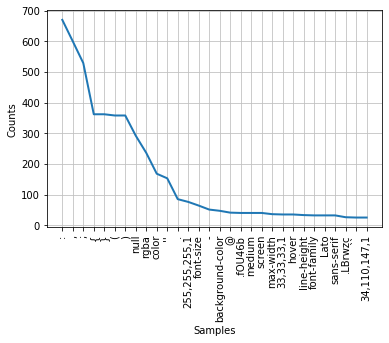

In [89]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()